<a href="https://colab.research.google.com/github/marhooo/AKMMH/blob/main/%D0%90%D0%9A%D0%9C%D0%9C%D0%9D_%D0%A4%D0%91_52%D0%BC%D0%BF_%D0%9F%D0%B5%D1%88%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D1%80%D0%B8%D1%82%D0%B0_%D0%9F%D1%80_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Аналіз кіберінцидентів методами машинного навчання
Практична робота №3

Тема: Метод опорних векторів в системах машинного навчання

Метод опорних векторів (SVM) є потужним алгоритмом для класифікації та
регресії, що заснований на ідеї знаходження оптимальної розділяючої
гіперплощини між класами. Таким чином, SVM призначений для вирішення
задач класифікації та регресії. В основі методу лежить поняття
гіперплощини, що найкращим чином розділяє класи в просторі ознак.
Основним завданням SVM є знаходження гіперплощини, яка
максимізує відстань між найближчими до неї точками кожного класу,
відомих як опорні вектори. Для нелінійної класифікації SVM використовує
ядро, яке перетворює вхідний простір ознак у простір більш високої
розмірності, де можливо знайти лінійно розділювальну гіперплощину. У
випадку регресії, SVM знаходить гіперплощину, що мінімізує помилку
моделі, з урахуванням штрафу за відхилення точок від функції регресії.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Налаштування відображення
pd.set_option('display.max_columns', None)

## Завантаження та первинний огляд даних

In [14]:
path = '/content/salaries_cyber.csv'
df = pd.read_csv('salaries_cyber.csv')

print("Розмірність датасету:", df.shape)
print("\nПерші 5 рядків датасету:")
print(df.head())
print("\nКількість пропусків у кожному стовпці:")
print(df.isnull().sum())
print("\nРозподіл цільової змінної 'experience_level':")
print(df['experience_level'].value_counts())

Розмірність датасету: (1247, 11)

Перші 5 рядків датасету:
   work_year experience_level employment_type               job_title  salary  \
0       2022               EN              FT   Cyber Program Manager   63000   
1       2022               MI              FT        Security Analyst   95000   
2       2022               MI              FT        Security Analyst   70000   
3       2022               MI              FT     IT Security Analyst  250000   
4       2022               EN              CT  Cyber Security Analyst  120000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD          63000                 US            50   
1             USD          95000                 US             0   
2             USD          70000                 US             0   
3             BRL          48853                 BR            50   
4             USD         120000                 BW           100   

  company_location company_size  
0    

Дані не містять пропусків. Спостерігається значний дисбаланс класів, де Senior (SE) і Mid-level (MI) домінують, а Executive (EX) є найменш представленим класом.

## Підготовка ознак та попередня обробка
Для SVM необхідно масштабувати числові ознаки (як salary_in_usd) та закодувати категоріальні (як job_title або company_size). Це робиться автоматично за допомогою ColumnTransformer.

In [15]:
# Цільова змінна — experience_level
y = df['experience_level']
# Виключення цільової змінної та надлишкових даних про зарплату
X = df.drop(['experience_level', 'salary', 'salary_currency'], axis=1)

# Визначення типів колонок для попередньої обробки
numerical_features = ['salary_in_usd']
categorical_features = ['work_year', 'employment_type', 'job_title',
                        'employee_residence', 'remote_ratio', 'company_location',
                        'company_size']

preprocessor = ColumnTransformer(
    transformers=[
        # Масштабування числових ознак
        ('num', StandardScaler(), numerical_features),
        # One-Hot Encoding для категоріальних ознак
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## Поділ на навчальну і тестову вибірку
Використовуємо 70% даних для навчання та 30% для тестування, зберігаючи пропорції класів (stratify=y).

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

## Модель 1: SVM (Лінійне Ядро)
Базова модель, яка шукає лінійну розділяючу гіперплощину.

In [17]:
# Створення та навчання моделі SVM з лінійним ядром у Pipeline
svm_linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', SVC(kernel='linear', random_state=42))])

print("Навчання моделі SVM (Лінійне ядро)...")
svm_linear_model.fit(X_train, y_train)
y_pred_linear = svm_linear_model.predict(X_test)

print("\nРезультати SVM (Лінійне ядро):")
print("Accuracy:", round(accuracy_score(y_test, y_pred_linear), 3))
print(classification_report(y_test, y_pred_linear))

Навчання моделі SVM (Лінійне ядро)...

Результати SVM (Лінійне ядро):
Accuracy: 0.549
              precision    recall  f1-score   support

          EN       0.43      0.42      0.42        65
          EX       0.73      0.50      0.59        22
          MI       0.44      0.40      0.42       124
          SE       0.64      0.73      0.68       164

    accuracy                           0.55       375
   macro avg       0.56      0.51      0.53       375
weighted avg       0.54      0.55      0.54       375



## Модель 2: SVM (RBF Ядро)
Використовуємо нелінійне ядро (RBF), яке дозволяє моделі знаходити складніші залежності.

In [18]:
# Створення та навчання моделі SVM з RBF ядром у Pipeline
svm_rbf_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', SVC(kernel='rbf', random_state=42))])

print("Навчання моделі SVM (RBF ядро)...")
svm_rbf_model.fit(X_train, y_train)
y_pred_rbf = svm_rbf_model.predict(X_test)

print("\nРезультати SVM (RBF ядро):")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rbf), 3))
print(classification_report(y_test, y_pred_rbf))

Навчання моделі SVM (RBF ядро)...

Результати SVM (RBF ядро):
Accuracy: 0.595
              precision    recall  f1-score   support

          EN       0.52      0.46      0.49        65
          EX       1.00      0.23      0.37        22
          MI       0.54      0.47      0.50       124
          SE       0.64      0.79      0.71       164

    accuracy                           0.59       375
   macro avg       0.67      0.49      0.52       375
weighted avg       0.60      0.59      0.58       375



## Модель 3: SVM (RBF Ядро + Балансування)
Додаємо параметр class_weight='balanced' для боротьби з дисбалансом класів. Це змушує модель приділяти більше уваги рідкісним класам (як EX та EN), штрафуючи за помилки на них сильніше.

In [19]:
# Створення та навчання моделі SVM з RBF ядром ТА балансуванням класів
svm_rbf_balanced_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        kernel='rbf',
        class_weight='balanced',
        random_state=42
    ))
])

print("Навчання моделі SVM (RBF ядро + Балансування)...")
svm_rbf_balanced_model.fit(X_train, y_train)
y_pred_rbf_balanced = svm_rbf_balanced_model.predict(X_test)

print("\nРезультати SVM (RBF ядро + Балансування):")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rbf_balanced), 3))
print(classification_report(y_test, y_pred_rbf_balanced))

Навчання моделі SVM (RBF ядро + Балансування)...

Результати SVM (RBF ядро + Балансування):
Accuracy: 0.608
              precision    recall  f1-score   support

          EN       0.51      0.74      0.60        65
          EX       0.58      0.64      0.61        22
          MI       0.56      0.49      0.52       124
          SE       0.71      0.64      0.68       164

    accuracy                           0.61       375
   macro avg       0.59      0.63      0.60       375
weighted avg       0.62      0.61      0.61       375



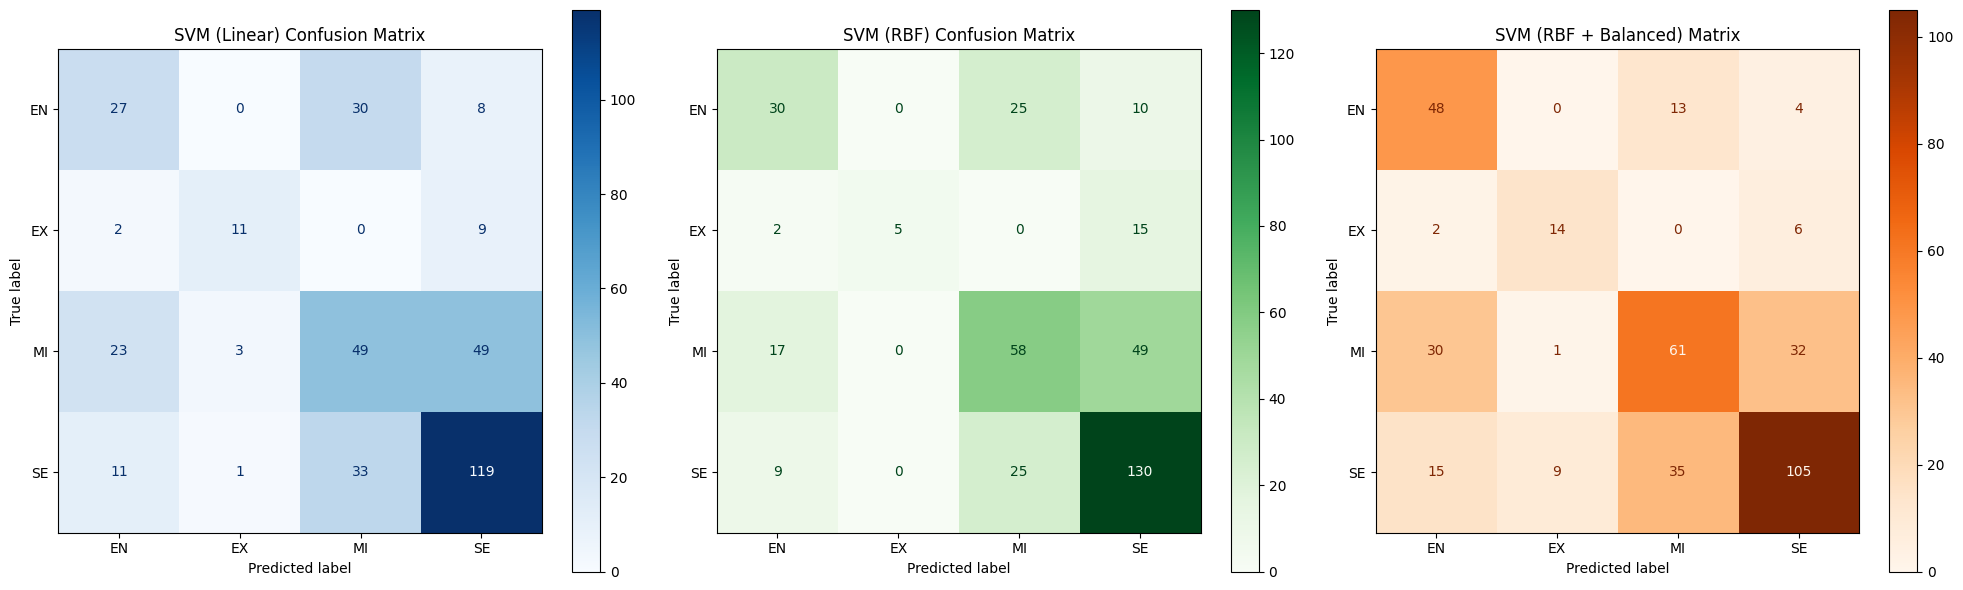

In [20]:
# Візуалізація матриць плутанини
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Матриця 1: Лінійне ядро
cm_linear = confusion_matrix(y_test, y_pred_linear)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=svm_linear_model.classes_)
disp_linear.plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title("SVM (Linear) Confusion Matrix")

# Матриця 2: RBF ядро
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=svm_rbf_model.classes_)
disp_rbf.plot(cmap='Greens', ax=ax[1], values_format='d')
ax[1].set_title("SVM (RBF) Confusion Matrix")

# Матриця 3: RBF + Балансування
cm_rbf_balanced = confusion_matrix(y_test, y_pred_rbf_balanced)
disp_rbf_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_rbf_balanced, display_labels=svm_rbf_balanced_model.classes_)
disp_rbf_balanced.plot(cmap='Oranges', ax=ax[2], values_format='d')
ax[2].set_title("SVM (RBF + Balanced) Matrix")

plt.tight_layout()
plt.show()

## Аналіз матриць плутанини:

Модель 1 (Linear): Сильно плутає класи MI та SE.

Модель 2 (RBF): Покращує розпізнавання SE, але майже повністю ігнорує клас EX (лише 5 правильних прогнозів з 22), оскільки він незбалансований.

Модель 3 (RBF + Balanced): Найкращий результат. Завдяки балансуванню, модель почала значно краще розпізнавати рідкісні класи. Кількість правильних прогнозів для EX зросла з 5 до 14, а для EN — з 30 до 48. Це призвело до значного зростання recall для цих класів.

## Порівняння точності моделей
Загальна точність (Accuracy) зросла з 0.549 (Лінійна) до 0.595 (RBF) і досягла 0.608 (RBF + Балансування). Важливіше те, що покращилися macro avg f1-score (з 0.52 до 0.60), що вказує на кращий загальний баланс класифікації всіх класів, а не лише домінуючих.

## Висновки щодо якості класифікації та факторів впливу
На точність класифікації рівня досвіду методом SVM вплинули наступні фактори:

1. Дисбаланс Класів - найбільша проблема цього датасету. Моделі без балансування (Лінійна та RBF) досягали точності, ігноруючи рідкісні класи (EX мав recall 0.23), оскільки їм "вигідніше" було прогнозувати домінуючий клас SE.

Додавання class_weight='balanced' (Модель 3) змусило SVM приділити увагу меншим класам, що значно покращило recall для EN (з 0.46 до 0.74) та EX (з 0.23 до 0.64), і підвищило загальну якість моделі.

2. Вибір Ядра (Лінійність даних):

Перехід від kernel='linear' (Acc: 0.549) до kernel='rbf' (Acc: 0.595) значно покращив результат. Це чітко вказує, що залежність між ознаками (зарплата, посада, розмір компанії) та рівнем досвіду є нелінійною. Лінійна гіперплощина нездатна ефективно розділити ці класи.

3. Масштабування Числових Ознак:

SVM базується на обчисленні відстаней. Без масштабування (StandardScaler) ознака salary_in_usd (з діапазоном до 300,000+) повністю "заглушила" б усі інші ознаки, що призвело б до вкрай низької точності.

4. Висока Розмірність Ознак:

OneHotEncoder перетворив категоріальні ознаки (особливо job_title та employee_residence) у сотні нових бінарних ознак. SVM відомий своєю ефективністю у високорозмірних просторах, тому він зміг впоратися з цим завданням краще, ніж, наприклад, просте Дерево Рішень.

**Загальний висновок**: Найкращу якість класифікації для цього датасету показала модель SVM з RBF ядром та балансуванням класів (Accuracy: 0.608).